# Прогнозирование цен на жилье в США.

## Описание данных.

Нами был найден интересный набор для предсказания цен на жилье в США. Наша задача состоит в поиске и обучении модели, которая будет делать прогнозирования. Строить модели будем при помощи ансмаблевого метода, а именно будем сравнивать какая модель себя проявит лучще: градиентный бустинг (Gradient Boosting) или адаптивный бустинг (Adaptive Boosting).<br><br>Набор имеет следующие данные:<br>**1) Date (Дата):** Дата продажи недвижимости. Этот признак помогает анализировать временные тенденции в ценах на недвижимость.<br>
**2) Price (Цена):** Цена продажи недвижимости в долларах США. Это целевая переменная, которую мы стремимся предсказать.<br>
**3) Bedrooms (Спальни):** Количество спален в недвижимости. Как правило, недвижимость с большим количеством спален имеет более высокую цену.<br>
**4) Bathrooms (Ванные комнаты):** Количество ванных комнат в недвижимости. Аналогично спальням, большее количество ванных комнат может увеличить стоимость недвижимости.<br>
**5) Sqft Living (Площадь жилой зоны):** Площадь жилой зоны в квадратных футах. Большие жилые зоны обычно связаны с более высокой стоимостью недвижимости.<br>
**6) Sqft Lot (Площадь участка):** Площадь участка в квадратных футах. Большие участки могут увеличить привлекательность и стоимость недвижимости.<br>
**7) Floors (Этажи):** Количество этажей в недвижимости. Недвижимость с несколькими этажами может предлагать больше жилого пространства и привлекательности.<br>
**8) Waterfront (Вид на воду):** Бинарный индикатор (1, если у недвижимости есть вид на воду, 0 в противном случае). Недвижимость с видом на воду часто оценивается выше.<br>
**9) View (Вид):** Индекс от 0 до 4, указывающий на качество вида из недвижимости. Лучшие виды, как правило, повышают стоимость недвижимости.<br>
**10) Condition (Состояние):** Индекс от 1 до 5, оценивающий состояние недвижимости. Недвижимость в лучшем состоянии обычно стоит дороже.<br>
**11) Sqft Above (Площадь над землей):** Площадь недвижимости над подвалом. Этот признак помогает выделить вклад площади над землей в общую стоимость.<br>
**12) Sqft Basement (Площадь подвала):** Площадь подвала. Подвалы могут добавлять стоимость в зависимости от их пригодности для использования.<br>
**13) Yr Built (Год постройки):** Год постройки недвижимости. Старые здания могут иметь историческую ценность, в то время как новые могут предлагать современные удобства.<br>
**14) Yr Renovated (Год ремонта):** Год последнего ремонта недвижимости. Недавние ремонты могут увеличить привлекательность и стоимость недвижимости.<br>
**15) Street (Улица):** Адрес недвижимости. Этот признак может использоваться для анализа тенденций цен в зависимости от местоположения.<br>
**16) City (Город):** Город, в котором находится недвижимость. Разные города имеют свои уникальные рыночные условия.<br>
**17) Statezip (Штат и почтовый индекс):** Штат и почтовый индекс недвижимости. Этот признак предоставляет региональный контекст для недвижимости.<br>
**18) Country (Страна):** Страна, в которой находится недвижимость. Хотя этот набор данных фокусируется на недвижимости в Австралии, этот признак включен для полноты.<br><br>Ознакомившись с датасетом, приступим к поставленной задаче.

## Загрузка данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

RANDOM_STATE = 42
TEST_SIZE = 0.1

In [2]:
df = pd.read_csv('/Users/nolvi/Downloads/USA Housing Dataset.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

**Промежуточный вывод:**<br>На первый взгляд, с данными все в порядке, за исключением пары моментов.

## Предобработка данных.

In [5]:
df['date'] =  pd.to_datetime(df['date'])

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

**Промежуточный вывод:**<br>Предобработка данных прошла скучно, так как проблем не было обнаружено, кроме типа данных в столбце 'date'.

## Корреляционный анализ.

interval columns not set, guessing: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable street is large: 4079. Are you sure this is not an interval variable? Analysis for pairs of variables including street can be slow.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable country for analysis 1. Dropping this column
  warnings.warn(


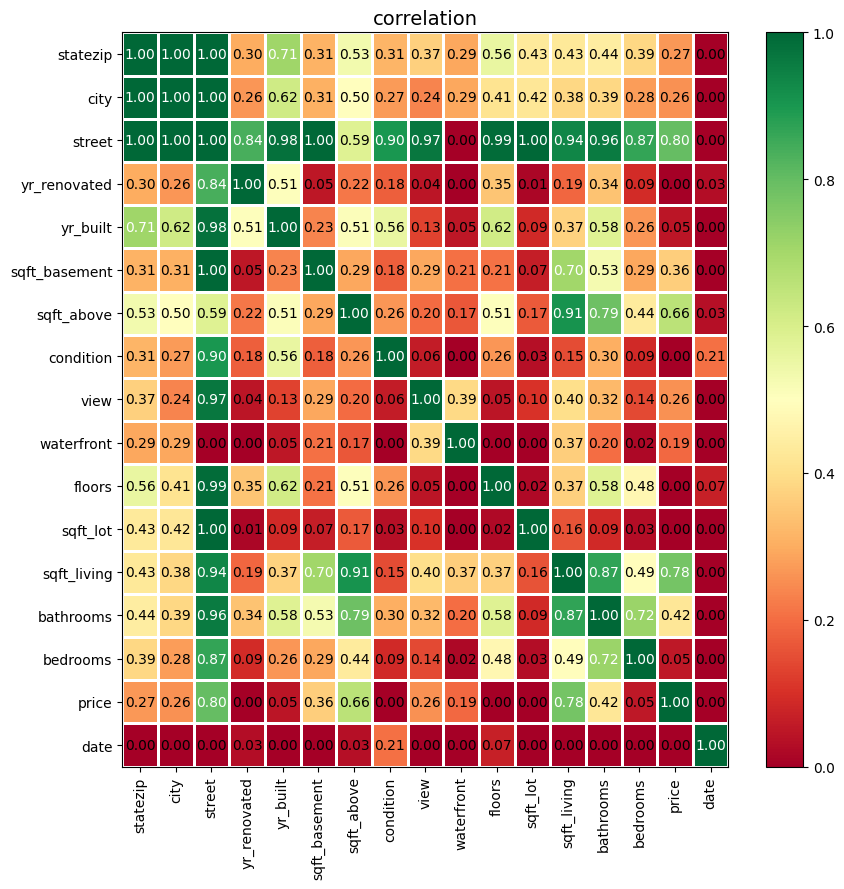

In [8]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0,
    vmax=1,
    figsize=(9, 9)
)

plt.show()
None

**Промежуточный вывод:**<br>Из матрицы корреляции видно , что на цену недвижимости сильнее всего влияют адрес, площадь над подвалом и площадь жилой зоны. В подготовке данных избавимся от лишних признаков, которые не оказывают никакого влияния.

## Подготовка данных.

In [9]:
X = df.drop(['date', 'yr_renovated', 'condition', 'floors', 'sqft_lot', 'price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state = RANDOM_STATE)

cat = [ 'street', 'city', 'statezip', 'country']
num = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'yr_built']

In [10]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num),
        ('cat', cat_transformer, cat)
    ],
    remainder='passthrough'
)

In [11]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('models', GradientBoostingRegressor())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'waterfront',
                                                   'view', 'sqft_above',
                                                   'sqft_basement',
                                                   'yr_built']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['street', 'city', 'statezip',
                                                   'country'])])),
                ('models', GradientBoostingRegressor())])

**Промежуточный вывод:**<br>Перейдем к поиску лучшей модели.

## Поиск лучшей модели.

In [12]:
param_grid = [
    {
        'models': [AdaBoostRegressor(random_state=42, base_estimator=DecisionTreeRegressor())],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__n_estimators': [50, 100, 200, 300],
        'models__learning_rate': [0.01, 0.1, 0.2, 1.0],
        'models__base_estimator__max_depth': [3, 5, 7, 9]
    },
    {
        'models': [GradientBoostingRegressor(random_state=42)],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__n_estimators': [50, 100, 200, 300],
        'models__learning_rate': [0.01, 0.1, 0.2],
        'models__max_depth': [3, 5, 7],
        'models__subsample': [0.8, 0.9, 1.0]
    }
]

In [13]:
random_search = RandomizedSearchCV(pipe, param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/en

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['bedrooms',
                                                                                'bathrooms',
                                                                                'sqft_living',
                                                                                'waterfront',
                                                                                'view',
                                                                                'sqft_above',
                                                                                'sqft_basement',
                                                                                'yr_built']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),...
                                         'preprocessor__num__scaler': [StandardScaler(),
                                                                       MinMaxScaler(),
                                                                       'passthrough']},
                                        {'models': [GradientBoostingRegressor(random_state=42)],
                                         'models__learning_rate': [0.01, 0.1,
                                                                   0.2],
                                         'models__max_depth': [3, 5, 7],
                                         'models__n_estimators': [50, 100, 200,
                                                                  300],
                                         'models__subsample': [0.8, 0.9, 1.0],
                                         'preprocessor__num__scaler': [StandardScaler(),
                                                                       MinMaxScaler(),
                                                                       'passthrough']}],
                   random_state=42)

In [14]:
print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   'passthrough')]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'waterfront',
                                                   'view', 'sqft_above',
                                                   'sqft_basement',
                                                   'yr_built']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  

**Промежуточный вывод:**<br>Лучшая модель найдена, перейдем к ее обучению и тестированию.

## Обучение и тестирование лучшей модели.

In [15]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   'passthrough')]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'waterfront',
                                                   'view', 'sqft_above',
                                                   'sqft_basement',
                                                   'yr_built']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['street', 'city', 'statezip',
                                                   'country'])])),
                ('models',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=5,
                                           n_estimators=300, random_state=42,
                                           subsample=0.9))])

In [16]:
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)

print(f"Тестовый R²: {test_r2}")

Тестовый R²: 0.7097141206230166


**Промежуточный вывод:**<br>Мы видим отличные показатели метрики на тестовом наюоре данных, а значит мы отлично справились с поставленной задачей.

## Общий вывод.

В рамках данного проекта была поставлена задача по предсказанию цен на жилье в США с использованием ансамблевых методов машинного обучения. А именно, сравнивались модели градиентного бустинга (Gradient Boosting) и адаптивного бустинга (Adaptive Boosting).<br>Предоставленный набор данных содержал 18 признаков, которые охватывали различные аспекты недвижимости.<br>Нами были выявлены важные признаки, оказывающие наибольшее влияние на цену недвижимости, такие как площадь над подвалом, площадь жилой зоны и адрес.<br>Единственной выявленной проблемой на этапе предобработки данных был некорректный тип данных в столбце 'date', который был успешно исправлен.
Лишние признаки, которые не оказывали значимого влияния на цену недвижимости, были удалены.
Построение и обучение модели:

Для построения моделей использовались ансамблевые методы: градиентный бустинг и адаптивный бустинг.
Лучшая модель была выбрана на основе результатов обучения и тестирования. Ею оказалась модель градиентного бустинга (Gradient Boosting Regressor) с параметрами: learning_rate=0.2, max_depth=5, n_estimators=300, random_state=42, subsample=0.9.
Тестирование и оценка модели:

Лучшая модель была протестирована, и результатом стала высокая метрика R² на тестовом наборе данных: 0.7097141206230166.
Это указывает на то, что модель способна объяснить около 71% вариации цены недвижимости, что является отличным результатом для данной задачи.
Заключение
Мы успешно выполнили поставленную задачу по предсказанию цен на жилье в США. Проанализировав данные и применив ансамблевые методы, мы выбрали и обучили модель градиентного бустинга, которая показала высокие результаты на тестовом наборе данных. Высокая метрика R² подтверждает, что наша модель обладает хорошей предсказательной способностью, и можно заключить, что работа выполнена успешно.